In [25]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import torch
from birdclassification.preprocessing.filtering import filter_recordings_30
from sklearn.model_selection import train_test_split
from birdclassification.training.dataset import Recordings30

df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    'target': [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2]
})
 
X = df.drop('target', axis=1).values
y = df['target'].values

## Initial distribution

In [26]:
df = pd.DataFrame(X).assign(label = y)
df

,0,label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,0
6,7,1
7,8,1
8,9,1
9,10,1


In [27]:
x = df.groupby(['label']).count()
x

,0
label,
0,1
1,9
2,3


## Resampled distribution (oversample to majority class)

In [28]:
ros = RandomOverSampler(random_state=123, sampling_strategy='not majority')
X_resampled, y_resampled = ros.fit_resample(X, y)

In [29]:
df_r = pd.DataFrame(X_resampled).assign(label = y_resampled)
df_r

,0,label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,0
6,7,1
7,8,1
8,9,1
9,10,1


In [30]:
x = df_r.groupby(['label']).count()
x

,0
label,
0,9
1,9
2,9


## Resampled distribution (dictionary)

### Fixed dictionary

In [31]:
dict = {0:9, 1:9, 2:5}

ros = RandomOverSampler(random_state=123, sampling_strategy=dict)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [32]:
df_r = pd.DataFrame(X_resampled).assign(label = y_resampled)
df_r

,0,label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,0
6,7,1
7,8,1
8,9,1
9,10,1


In [33]:
x =df_r.groupby(['label']).count()
x

,0
label,
0,9
1,9
2,5


### Resample to max(number of elements in class, threshold n_sample)

In [34]:
dist = df.groupby('label').count()
n_sample = 5
dist_dict = {}

for i in range(len(dist.index)):
    dist_dict[i] = max(dist.iloc[i, 0], n_sample)

dist_dict

{0: 5, 1: 9, 2: 5}

In [35]:
ros = RandomOverSampler(random_state=123, sampling_strategy=dist_dict)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [36]:
df_r = pd.DataFrame(X_resampled).assign(label = y_resampled)
df_r

,0,label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,0
6,7,1
7,8,1
8,9,1
9,10,1


In [37]:
x =df_r.groupby(['label']).count()
x

,0
label,
0,5
1,9
2,5


## Recording dataset

In [38]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
SEED = 123
#RECORDINGS_DIR = '/mnt/d/recordings_30/'
RECORDINGS_DIR = '/media/jacek/E753-A120/recordings_287/'
NOISES_DIR = '/path/to/noise/dataset'
SAMPLE_RATE = 32000
NUM_SAMPLES = SAMPLE_RATE * 1
BATCH_SIZE = 32
LEARNING_RATE = 0.0001
EPOCHS = 5
NUM_WORKERS = 8

df = filter_recordings_30("../data/xeno_canto_recordings.csv", "../data/bird-list-extended.csv")
train_df, test_val_df = train_test_split(df, stratify=df['Latin name'], test_size=0.2, random_state = SEED)
val_df, test_df = train_test_split(test_val_df, stratify=test_val_df['Latin name'], test_size=0.5, random_state = SEED)

train_ds = Recordings30(train_df, recording_dir=RECORDINGS_DIR, device = DEVICE, random_fragment=True)
val_ds = Recordings30(val_df, recording_dir=RECORDINGS_DIR, device = DEVICE)
test_ds = Recordings30(test_df, recording_dir=RECORDINGS_DIR, device = DEVICE)

/home/jacek/Documents/PycharmProjects/Bird-classification-model/birdclassification/preprocessing/filtering.py:72: DtypeWarning: Columns (10,39,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  recordings = pd.read_csv(filepath_recordings)


In [39]:
df

,level_0,index,Unnamed: 0,id,gen,sp,ssp,group,en,rec,...,smp,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Latin name
0,0,5,5,815762,Cygnus,olor,NaN,birds,Mute Swan,Frédéric Cazaban,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cygnus olor
1,1,6,6,808540,Cygnus,olor,NaN,birds,Mute Swan,Juha Saari,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cygnus olor
2,2,7,7,805048,Cygnus,olor,NaN,birds,Mute Swan,Magnus Hellström,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cygnus olor
3,3,8,8,804791,Cygnus,olor,NaN,birds,Mute Swan,Uku Paal,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cygnus olor
4,4,9,9,797609,Cygnus,olor,NaN,birds,Mute Swan,Jorge Leitão,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cygnus olor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41204,41205,296788,296788,108758,Columba,livia,NaN,birds,Rock Dove,Albert Lastukhin,...,44100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columba livia
41205,41206,296789,296789,58488,Columba,livia,NaN,birds,Rock Dove,Mike Nelson,...,44100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columba livia
41206,41207,296790,296790,6924,Columba,livia,domestica,birds,Rock Dove,Glauco Alves Pereira,...,22050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columba livia
41207,41208,296791,296791,387816,Columba,livia,NaN,birds,Rock Dove,johannes buhl,...,44100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Columba livia


In [40]:
df_s = df[['Latin name', 'id']].astype(str)
distribution_df = df_s.groupby('Latin name').count()
distribution_df.columns = ['recordings number']
distribution_df = distribution_df.sort_values('recordings number')
distribution_df

,recordings number
Latin name,
Ciconia ciconia,137
Tetrao urogallus,150
Phalacrocorax carbo,210
Columba livia,218
Sternula albifrons,356
Cygnus olor,521
Phasianus colchicus,642
Corvus frugilegus,707
Apus apus,708


<Axes: ylabel='Frequency'>

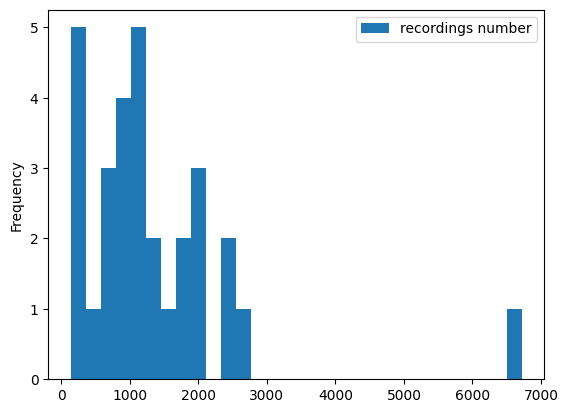

In [41]:
distribution_df.plot.hist(bins = 30)

In [42]:
dist = df.groupby('Latin name').count()
n_sample = 1000
dist_dict = {}

for i in range(len(dist.index)):
    dist_dict[train_ds.get_mapping()[i]] = max(dist.iloc[i, 0], n_sample)

dist_dict

{'Alauda arvensis': 2647,
 'Anas platyrhynchos': 1081,
 'Apus apus': 1000,
 'Asio otus': 1265,
 'Buteo buteo': 1000,
 'Carduelis carduelis': 2066,
 'Ciconia ciconia': 1000,
 'Columba livia': 1000,
 'Corvus corax': 2076,
 'Corvus cornix': 1212,
 'Corvus frugilegus': 1000,
 'Cuculus canorus': 1942,
 'Cygnus olor': 1000,
 'Dendrocopos major': 2454,
 'Garrulus glandarius': 1880,
 'Grus grus': 1000,
 'Hirundo rustica': 1665,
 'Lophophanes cristatus': 1000,
 'Passer domesticus': 2489,
 'Phalacrocorax carbo': 1000,
 'Phasianus colchicus': 1000,
 'Phoenicurus ochruros': 1334,
 'Pica pica': 1140,
 'Picus viridis': 1027,
 'Sternula albifrons': 1000,
 'Sturnus vulgaris': 1703,
 'Tetrao urogallus': 1000,
 'Turdus merula': 6717,
 'Turdus torquatus': 1000,
 'Turdus viscivorus': 1197}

In [43]:
X = df.drop('Latin name', axis=1).values
y = df['Latin name'].values

In [44]:
ros = RandomOverSampler(random_state=123, sampling_strategy=dist_dict)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [45]:
df_r = pd.DataFrame(X_resampled).assign(label = y_resampled)
df_r.columns = df.columns
df_r

,level_0,index,Unnamed: 0,id,gen,sp,ssp,group,en,rec,...,smp,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Latin name
0,0,5,5,815762,Cygnus,olor,NaN,birds,Mute Swan,Frédéric Cazaban,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cygnus olor
1,1,6,6,808540,Cygnus,olor,NaN,birds,Mute Swan,Juha Saari,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cygnus olor
2,2,7,7,805048,Cygnus,olor,NaN,birds,Mute Swan,Magnus Hellström,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cygnus olor
3,3,8,8,804791,Cygnus,olor,NaN,birds,Mute Swan,Uku Paal,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cygnus olor
4,4,9,9,797609,Cygnus,olor,NaN,birds,Mute Swan,Jorge Leitão,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cygnus olor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46890,29222,229478,229478,595060,Turdus,torquatus,NaN,birds,Ring Ouzel,Philippe Gayet,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turdus torquatus
46891,29311,229567,229567,390617,Turdus,torquatus,NaN,birds,Ring Ouzel,Lars Edenius,...,48000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turdus torquatus
46892,29289,229545,229545,478799,Turdus,torquatus,NaN,birds,Ring Ouzel,Simon Gillings,...,32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turdus torquatus
46893,28990,229246,229246,177450,Turdus,torquatus,alpestris,birds,Ring Ouzel,Jerome Fischer,...,48000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turdus torquatus


In [46]:
df_s = df_r[['Latin name', 'id']].astype(str)
distribution_df = df_s.groupby('Latin name').count()
distribution_df.columns = ['recordings number']
distribution_df = distribution_df.sort_values('recordings number')
distribution_df

,recordings number
Latin name,
Corvus frugilegus,1000
Apus apus,1000
Phalacrocorax carbo,1000
Buteo buteo,1000
Tetrao urogallus,1000
Ciconia ciconia,1000
Columba livia,1000
Lophophanes cristatus,1000
Phasianus colchicus,1000


## Use implemented function

In [47]:
from birdclassification.preprocessing.utils import oversample_dataframe, undersample_dataframe

In [56]:
result = oversample_dataframe(df, minimum_number_of_samples= 1000, mapping = train_ds.get_mapping(), seed = SEED)
result = undersample_dataframe(result, maximum_number_of_samples = 1025, mapping = train_ds.get_mapping(), seed = SEED)
result

,level_0,index,Unnamed: 0,id,gen,sp,ssp,group,en,rec,...,smp,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Latin name
0,20944,133985,133985,683109,Alauda,arvensis,NaN,birds,Eurasian Skylark,Sergi,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alauda arvensis
1,20924,133965,133965,686272,Alauda,arvensis,NaN,birds,Eurasian Skylark,David Bissett,...,48000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alauda arvensis
2,21312,134353,134353,374286,Alauda,arvensis,NaN,birds,Eurasian Skylark,Manuel Grosselet,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alauda arvensis
3,22710,135751,135751,674961,Alauda,arvensis,NaN,birds,Eurasian Skylark,Albert Lastukhin,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alauda arvensis
4,21330,134371,134371,363898,Alauda,arvensis,NaN,birds,Eurasian Skylark,David Bissett,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alauda arvensis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30420,28738,220530,220530,303525,Turdus,viscivorus,NaN,birds,Mistle Thrush,johannes buhl,...,48000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turdus viscivorus
30421,28289,220081,220081,583296,Turdus,viscivorus,NaN,birds,Mistle Thrush,Peter van Vlaardingen,...,48000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turdus viscivorus
30422,28803,220595,220595,755614,Turdus,viscivorus,NaN,birds,Mistle Thrush,chambris,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turdus viscivorus
30423,28173,219965,219965,706837,Turdus,viscivorus,NaN,birds,Mistle Thrush,Irish Wildlife Sounds,...,44100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turdus viscivorus


In [57]:
result.groupby(['Latin name']).count()

,level_0,index,Unnamed: 0,id,gen,sp,ssp,group,en,rec,...,mic,smp,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
Latin name,,,,,,,,,,,,,,,,,,,,,
Alauda arvensis,1025,1025,1025,1025,1025,1025,256,1025,1025,1025,...,126,1017,8,0,0,0,0,0,0,0
Anas platyrhynchos,1025,1025,1025,1025,1025,1025,50,1025,1025,1025,...,48,1014,11,0,0,0,0,0,0,0
Apus apus,1000,1000,1000,1000,1000,1000,126,1000,1000,1000,...,92,979,21,0,0,0,0,0,0,0
Asio otus,1025,1025,1025,1025,1025,1025,49,1025,1025,1025,...,67,1015,10,0,0,0,0,0,0,0
Buteo buteo,1000,1000,1000,1000,1000,1000,117,1000,1000,1000,...,80,992,9,0,1,0,0,1,0,0
Carduelis carduelis,1025,1025,1025,1025,1025,1025,259,1025,1025,1025,...,63,1015,7,3,2,0,0,0,0,0
Ciconia ciconia,1000,1000,1000,1000,1000,1000,25,1000,1000,1000,...,48,1000,0,0,0,0,0,0,0,0
Columba livia,1000,1000,1000,1000,1000,1000,181,1000,1000,1000,...,88,1000,0,0,0,0,0,0,0,0
Corvus corax,1025,1025,1025,1025,1025,1025,157,1025,1025,1025,...,58,1003,20,3,2,0,0,0,0,0
